In [72]:
# The code consists 1) Correlation 2) Performance 3) Risk Parity

In [73]:
# 1) Correlation

In [74]:
#!pip install matplotlib
#!pip install riskfolio-lib
#!pip install yfinance

In [75]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import seaborn as sns

In [76]:
# S&P 500 stocks
stock_data= ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM',
             'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
             'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON',
             'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP',
             'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BIIB', 'BIO', 'BK', 'BKNG',
             'BKR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB',
             'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW',
             'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
             'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS',
             'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX',
             'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRI', 'DTE', 'DUK', 'DVA',
             'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'ELV', 'EMN', 'EMR', 'ENPH',
             'EOG', 'EPAM', 'EQIX', 'EQR', 'EQT', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD',
             'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FCX', 'FDS', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLT',
             'FMC', 'FOX', 'FRC', 'FRT', 'FSLR', 'FTNT', 'FTV', 'GD', 'GE', 'GEN', 'GILD', 'GIS', 'GL', 'GLW',
             'GM', 'GNRC', 'GOOG', 'GPC', 'GPN', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HCA', 'HD', 'HES',
             'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM',
             'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'INVH', 'IP', 'IPG', 'IQV', 'IR', 'IRM',
             'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KDP', 'KEY', 'KEYS',
             'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LDOS', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ',
             'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUMN', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR',
             'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'META', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM',
             'MMC', 'MMM', 'MNST', 'MO', 'MOH', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MS', 'MSCI', 'MSFT',
             'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NDSN', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC',
             'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NXPI', 'O', 'ODFL', 'OGN', 
             'OKE', 'OMC', 'ON', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PARA', 'PAYC', 'PAYX', 'PCAR', 'PCG', 'PEAK',
             'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW',
             'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE',
             'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC',
             'SBNY', 'SBUX', 'SCHW', 'SEDG', 'SEE', 'SHW', 'SIVB', 'SJM', 'SLB', 'SNA', 'SNPS', 'SO', 'SPG',
             'SPGI', 'SRE', 'STE', 'STLD', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP',
             'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRGP',
             'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TXN', 'TXT', 'TYL', 'UAL', 'UDR',
             'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VFC', 'VICI', 'VLO', 'VMC', 'VNO', 'VRSK',
             'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WBD', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR',
             'WM', 'WMB', 'WMT', 'WRB', 'WRK', 'WST', 'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM',
             'ZBH', 'ZBRA', 'ZION', 'ZTS']

In [77]:
# Step 1: Retrieve historical stock price data for S&P 500 stocks
# Calculation to grab all the closing prices for the  stock list into one DataFrame
sp500_data = yf.download(stock_data, period = "3mo", interval ="1d")['Adj Close']

[*********************100%***********************]  498 of 498 completed


In [78]:
sp500_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-17,155.147247,17.080000,147.365479,135.732758,151.436874,163.655609,112.826149,64.000000,283.765686,344.380005,...,98.010002,70.523888,112.067650,36.683338,115.643211,129.732834,122.775696,293.579987,50.464539,159.195938
2023-01-18,153.819427,16.639999,145.163040,135.003876,147.839966,162.449326,110.955498,63.520000,276.812958,341.309998,...,98.360001,68.212448,109.765366,36.782967,113.190781,128.130219,121.847466,296.540009,47.884754,159.595001
2023-01-19,152.621368,16.280001,141.498901,135.063782,147.354431,162.439362,111.244057,63.389999,271.822601,342.529999,...,98.930000,67.458496,110.469948,36.484081,108.295876,125.472450,121.717705,287.720001,49.134960,161.949997
2023-01-20,155.666412,16.340000,145.666748,137.659805,148.226410,161.711609,112.258980,62.459999,279.372925,356.380005,...,99.269997,68.004120,112.484444,36.832783,109.841110,126.049789,123.853630,297.029999,51.079716,163.809998
2023-01-23,158.801300,16.170000,146.782761,140.894882,147.195892,161.223114,113.443062,63.130001,278.247345,364.980011,...,100.290001,67.468422,111.898949,37.271149,101.108055,126.089607,125.700111,317.760010,52.240623,166.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10,138.020004,14.150000,118.901749,162.029999,159.809845,166.380005,103.184326,68.650002,280.578186,376.250000,...,109.919998,70.760002,114.540001,39.779999,101.550003,131.100006,128.149994,301.959991,29.870001,170.869995
2023-04-11,138.520004,14.320000,120.669617,160.800003,159.908936,166.550003,102.776375,69.010002,285.209991,371.109985,...,107.980003,71.040001,115.349998,40.770000,102.730003,131.570007,131.380005,304.029999,30.110001,171.210007
2023-04-12,138.360001,13.000000,119.839996,160.100006,160.880005,165.419998,102.049995,70.230003,283.760010,369.890015,...,106.059998,71.040001,115.230003,40.509998,103.489998,131.979996,131.589996,301.410004,30.290001,171.449997


In [79]:
# Step 2: Calculate the correlation coefficients
# Assuming you have stock price data in a DataFrame called 'sp500_data'
correlation_matrix= sp500_data.corr().abs()
correlation_matrix["Sum"]=correlation_matrix.sum()
correlation_matrix

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,Sum
A,1.000000,0.808471,0.917844,0.644094,0.712860,0.341527,0.951896,0.530344,0.525807,0.162372,...,0.343623,0.564163,0.221876,0.689876,0.003026,0.034176,0.671930,0.841428,0.023110,306.402162
AAL,0.808471,1.000000,0.900377,0.700125,0.819015,0.058539,0.672639,0.338465,0.269181,0.150979,...,0.136584,0.360658,0.412027,0.601316,0.280732,0.335691,0.600115,0.932612,0.082213,288.952351
AAP,0.917844,0.900377,1.000000,0.688593,0.763945,0.193919,0.820161,0.388122,0.401357,0.045478,...,0.124801,0.510780,0.383564,0.656318,0.065793,0.135326,0.686270,0.961394,0.040755,311.578408
AAPL,0.644094,0.700125,0.688593,1.000000,0.721260,0.023760,0.546189,0.415999,0.126248,0.520963,...,0.173398,0.027437,0.584950,0.402191,0.561626,0.627163,0.036701,0.735853,0.343291,234.562109
ABBV,0.712860,0.819015,0.763945,0.721260,1.000000,0.229218,0.573159,0.641179,0.020069,0.135949,...,0.193499,0.026341,0.532078,0.272634,0.516479,0.344046,0.456370,0.789260,0.264401,249.837899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.003026,0.280732,0.065793,0.561626,0.516479,0.620195,0.128393,0.324049,0.580640,0.580387,...,0.622043,0.565990,0.458691,0.282448,1.000000,0.693284,0.329190,0.210411,0.439364,140.497633
ZBH,0.034176,0.335691,0.135326,0.627163,0.344046,0.413363,0.175396,0.026017,0.566386,0.758623,...,0.656245,0.391841,0.677165,0.050255,0.693284,1.000000,0.389216,0.292132,0.283856,144.921911
ZBRA,0.671930,0.600115,0.686270,0.036701,0.456370,0.264734,0.651919,0.236527,0.682607,0.511217,...,0.311219,0.581738,0.107921,0.465380,0.329190,0.389216,1.000000,0.595732,0.380506,253.899878
ZION,0.841428,0.932612,0.961394,0.735853,0.789260,0.071535,0.710601,0.286896,0.272810,0.183781,...,0.084612,0.420255,0.470429,0.577915,0.210411,0.292132,0.595732,1.000000,0.012252,302.912789


In [627]:
k=correlation_matrix["Sum"].sort_values()
k[55:65]

AEP    15217.6533%
WMT    15274.9167%
OMC    15306.6414%
CTAS   15352.8850%
EA     15356.2240%
TFX    15458.2858%
IR     15480.0670%
MNST   15513.1891%
MKTX   15544.7352%
CMG    15631.3644%
Name: Sum, dtype: float64

In [629]:
# list of stocks having least correlation i.e having low Sum of values
index = k.index
a_list = list(index)
m=a_list[55:65]
m

['AEP', 'WMT', 'OMC', 'CTAS', 'EA', 'TFX', 'IR', 'MNST', 'MKTX', 'CMG']

In [630]:
# Example of removing duplicates from a list
my_list = m

# Convert the list to a set to remove duplicates
unique_set = set(my_list)

# Convert the set back to a list
unique_list = list(unique_set)
# Sort the list alphabetically
unique_list.sort()
print(unique_list)

['AEP', 'CMG', 'CTAS', 'EA', 'IR', 'MKTX', 'MNST', 'OMC', 'TFX', 'WMT']


In [631]:
# Get the number of elements in the list using len() function
count = len(unique_list)
# Print the count of elements
print("Number of elements in the list:", count)

Number of elements in the list: 10


In [632]:
############################        Second filter                ####################################################

In [633]:
# 2) Performance

In [634]:
# Bhaskar list of correlated stocks
Sec_list= unique_list
print(Sec_list)

['AEP', 'CMG', 'CTAS', 'EA', 'IR', 'MKTX', 'MNST', 'OMC', 'TFX', 'WMT']


In [635]:
# Calculation to grab all the closing prices for the  stock list into one DataFrame
closing_df = yf.download(Sec_list, period="3mo", interval ="1d")['Adj Close'].pct_change() * 100
df1= closing_df 

[*********************100%***********************]  10 of 10 completed


In [636]:
df1 =df1.dropna()
df1

,AEP,CMG,CTAS,EA,IR,MKTX,MNST,OMC,TFX,WMT
Date,,,,,,,,,,
2023-01-18,-254.0589%,-254.5858%,-149.9284%,0.8087%,-158.4509%,22.5577%,-139.9628%,-131.4527%,-193.2812%,-247.2133%
2023-01-19,-88.6966%,-52.2475%,-242.3497%,0.8080%,-361.3593%,-50.1853%,-87.3533%,-56.9145%,-52.4443%,-142.7155%
2023-01-20,58.9328%,339.3961%,209.5461%,183.4791%,272.8280%,270.5351%,14.0196%,203.3849%,20.8334%,123.1721%
2023-01-23,53.1639%,271.0925%,27.9469%,112.7074%,97.5608%,-57.7421%,11.0001%,90.7143%,109.8899%,149.4238%
2023-01-24,4.3154%,-14.1485%,56.4222%,6.2784%,87.6725%,-135.3138%,290.6799%,189.2594%,-111.6333%,26.6405%
...,...,...,...,...,...,...,...,...,...,...
2023-04-10,-47.4230%,37.6813%,-38.0759%,36.7529%,185.4576%,-221.0958%,-39.9549%,17.1946%,-33.9055%,-19.2313%
2023-04-11,-10.5894%,133.0133%,5.5554%,4.7761%,23.4356%,79.5348%,-13.3715%,38.6225%,187.3086%,-29.2331%
2023-04-12,-8.4794%,-106.7059%,81.7304%,35.8050%,147.4820%,-23.0517%,36.3432%,2.1371%,-185.7415%,-48.6447%


In [637]:
df1["Portfolio_Returns"] = df1.loc[:,Sec_list].mean(axis = 1)
df1["Cummulative_Returns"] = df1["Portfolio_Returns"].cumsum()

In [638]:
df1

,AEP,CMG,CTAS,EA,IR,MKTX,MNST,OMC,TFX,WMT,Portfolio_Returns,Cummulative_Returns
Date,,,,,,,,,,,,
2023-01-18,-254.0589%,-254.5858%,-149.9284%,0.8087%,-158.4509%,22.5577%,-139.9628%,-131.4527%,-193.2812%,-247.2133%,-150.5567%,-150.5567%
2023-01-19,-88.6966%,-52.2475%,-242.3497%,0.8080%,-361.3593%,-50.1853%,-87.3533%,-56.9145%,-52.4443%,-142.7155%,-113.3458%,-263.9025%
2023-01-20,58.9328%,339.3961%,209.5461%,183.4791%,272.8280%,270.5351%,14.0196%,203.3849%,20.8334%,123.1721%,169.6127%,-94.2898%
2023-01-23,53.1639%,271.0925%,27.9469%,112.7074%,97.5608%,-57.7421%,11.0001%,90.7143%,109.8899%,149.4238%,86.5758%,-7.7141%
2023-01-24,4.3154%,-14.1485%,56.4222%,6.2784%,87.6725%,-135.3138%,290.6799%,189.2594%,-111.6333%,26.6405%,40.0173%,32.3032%
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10,-47.4230%,37.6813%,-38.0759%,36.7529%,185.4576%,-221.0958%,-39.9549%,17.1946%,-33.9055%,-19.2313%,-12.2600%,475.5390%
2023-04-11,-10.5894%,133.0133%,5.5554%,4.7761%,23.4356%,79.5348%,-13.3715%,38.6225%,187.3086%,-29.2331%,41.9052%,517.4443%
2023-04-12,-8.4794%,-106.7059%,81.7304%,35.8050%,147.4820%,-23.0517%,36.3432%,2.1371%,-185.7415%,-48.6447%,-6.9126%,510.5317%


In [639]:
# Pulling closing prices for S&P Index
df4 = yf.download("^GSPC", period = "3mo", interval ="1d")['Adj Close'].pct_change() * 100
df4=df4.dropna()
df4 = df4.rename('SPIndex', inplace=True)
#df1["Portfolio_Returns"] = df1.loc[:,Sec_list].mean(axis = 1)
#df4["Cummulative_Returns_SPX"] = df4.loc["SPIndex"].cumsum(axis = 0)
df4

[*********************100%***********************]  1 of 1 completed


Date
2023-01-18   -155.6260%
2023-01-19    -76.3835%
2023-01-20    189.1840%
2023-01-23    118.8134%
2023-01-24     -7.1150%
                ...    
2023-04-10      9.9630%
2023-04-11     -0.4135%
2023-04-12    -41.3488%
2023-04-13    132.6269%
2023-04-14    -20.6937%
Name: SPIndex, Length: 61, dtype: float64

In [640]:
# concatenating df3 and df4 along columns
df5 = pd.concat([df1["Portfolio_Returns"], df4], axis=1)
df5

,Portfolio_Returns,SPIndex
Date,,
2023-01-18,-150.5567%,-155.6260%
2023-01-19,-113.3458%,-76.3835%
2023-01-20,169.6127%,189.1840%
2023-01-23,86.5758%,118.8134%
2023-01-24,40.0173%,-7.1150%
...,...,...
2023-04-10,-12.2600%,9.9630%
2023-04-11,41.9052%,-0.4135%
2023-04-12,-6.9126%,-41.3488%


<Axes: xlabel='Date'>

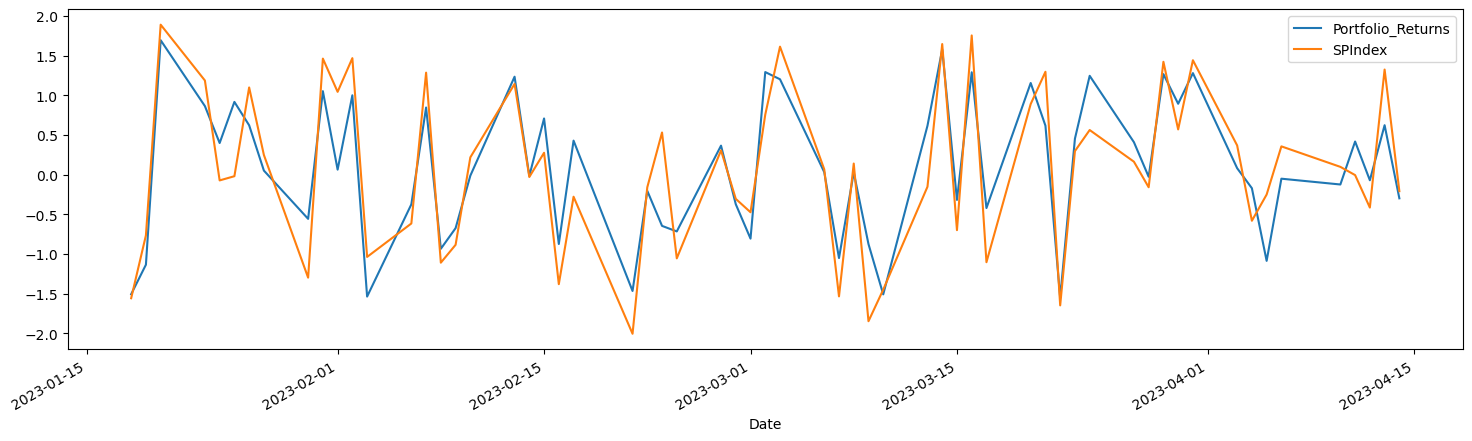

In [641]:
# Plot GSPC and Portfolio returns
df5.plot(figsize=(18, 5))

<Axes: >

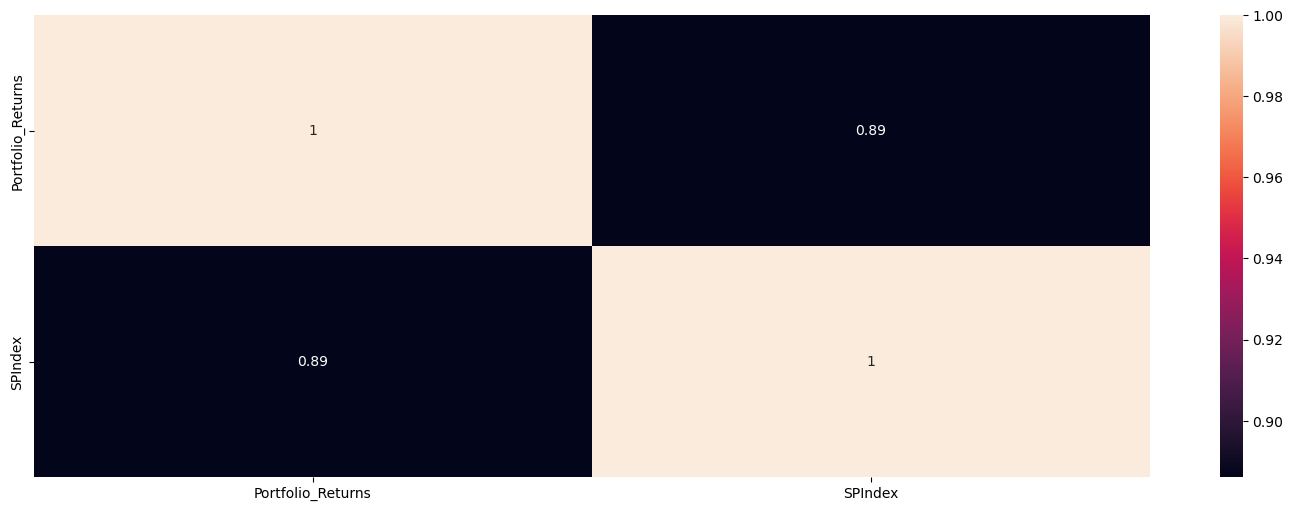

In [642]:
# Correlation between S&P Index and Portfolio
fig, ax = plt.subplots(figsize = (18, 6))
corr = df5.corr()
sns.heatmap(corr, annot = True)

In [643]:
# Find out sharpe ratio and standard deviation

In [644]:
# Calculate volatility and sharpe ratio for each stock.
#Sharpe Ratio = (expected return - risk free rate)/volatility
#Expected return = arithmetic average of returns.
#Volatility = standard deviation of returns.
#risk free return = 2% per annum.

In [645]:
# daily risk free rate.
rf = (1.02**(1/360))-1 

# New dataframe to stock_data.
stock_data = pd.DataFrame(columns=['security','e_returns','vol', 'sr' ]).set_index('security')

# Calculate volatilities, expected returns and sharpe ratios.
for security in df1.columns:
    vol = df1[security].std() # volatility
    e_r = df1[security].mean() # expected returns
    sr = (e_r-rf)/vol # Sharpe ratio
    stock_data.loc[security]= [e_r, vol,sr]
    
stock_data.shape

(12, 3)

In [646]:
# Extracting only Portfolio returns out of the dataframe
stock_data.tail(2)

,e_returns,vol,sr
security,,,
Portfolio_Returns,8.9071%,87.7063%,10.1493%
Cummulative_Returns,165.1164%,223.5362%,73.8632%


<Axes: ylabel='security'>

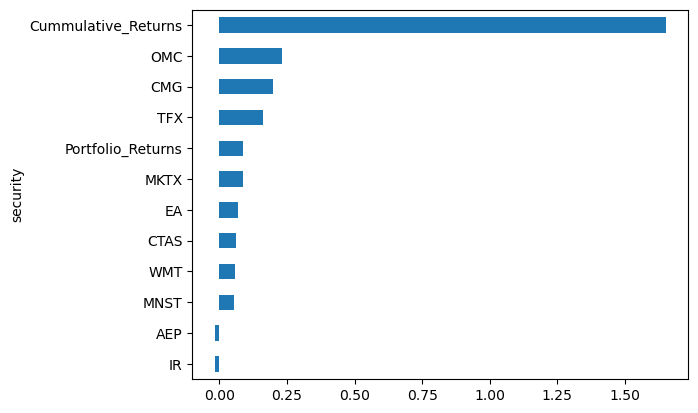

In [647]:
# Illustrate e_returns as a graph.
stock_data.e_returns.sort_values().plot.barh()

<Axes: ylabel='security'>

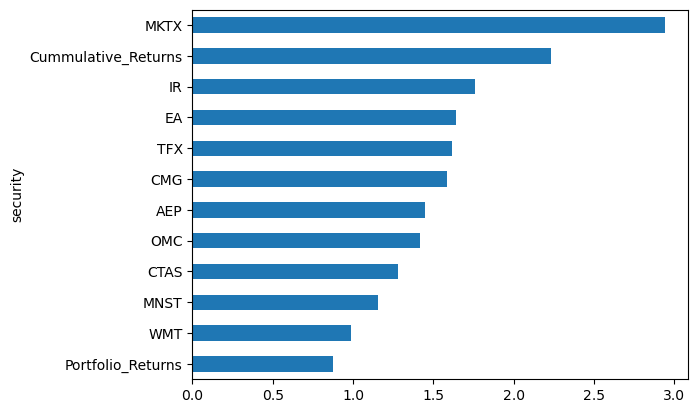

In [648]:
# Illustrate Volatility as a graph.
stock_data.groupby("security").vol.mean().sort_values().plot.barh()

<Axes: ylabel='security'>

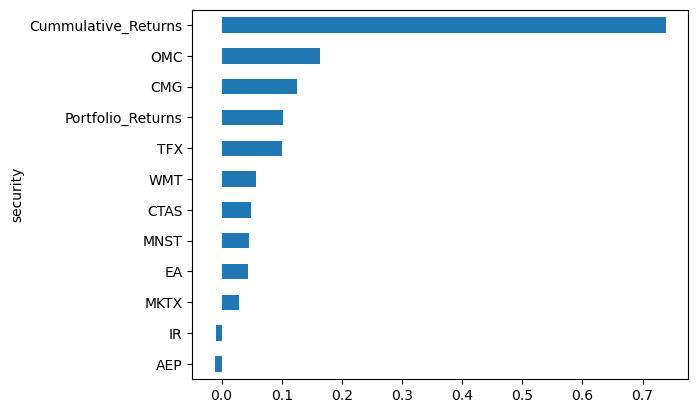

In [649]:
# Illustrate Sharpe ratio as a graph.
stock_data.sr.sort_values().plot.barh()

<Axes: xlabel='Date'>

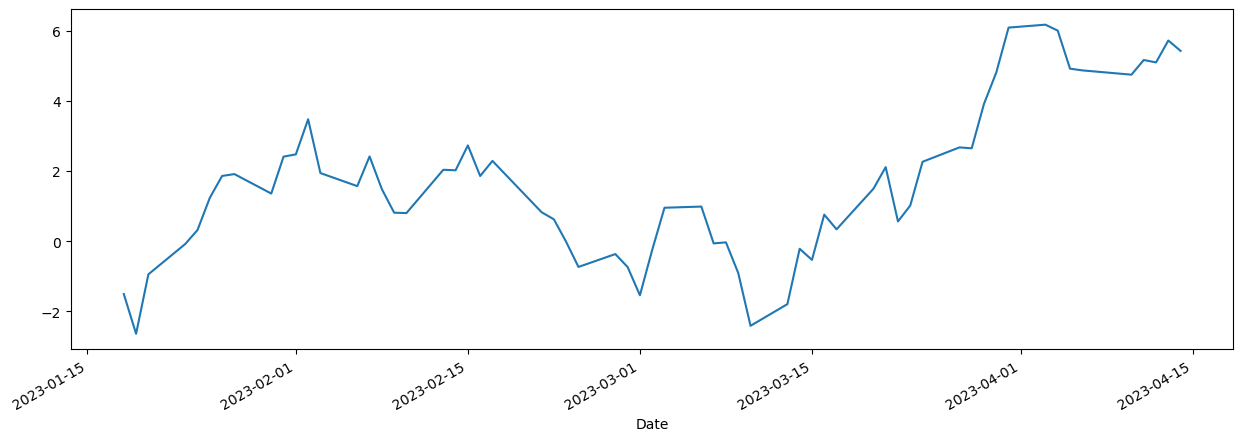

In [650]:
df1["Cummulative_Returns"].plot(figsize=(15,5))

In [651]:
######################## Third Filter All Risk Parity #############################################################

In [652]:
# Risk Parity

In [653]:
# Date range
#start = '2023-02-13'
#end = '2023-04-10'

# Tickers of assets
tickers =unique_list
tickers.sort()

In [654]:
# Downloading the data
data = yf.download(tickers, period="3mo")
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

[*********************100%***********************]  10 of 10 completed


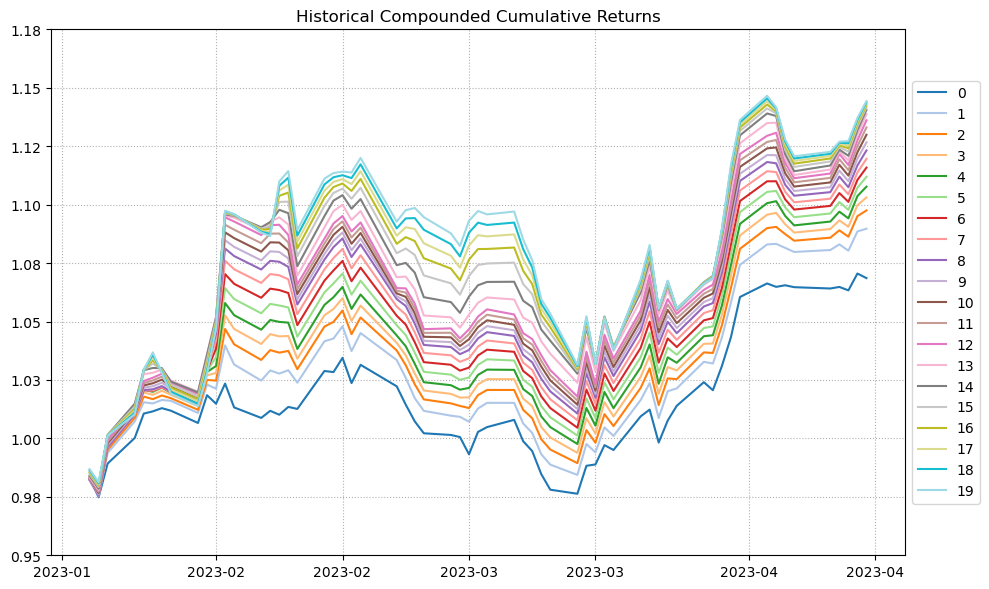

In [655]:
ax = rp.plot_series(returns=assets, w=ws, cmap='tab20', height=6, width=10,
                    ax=None)

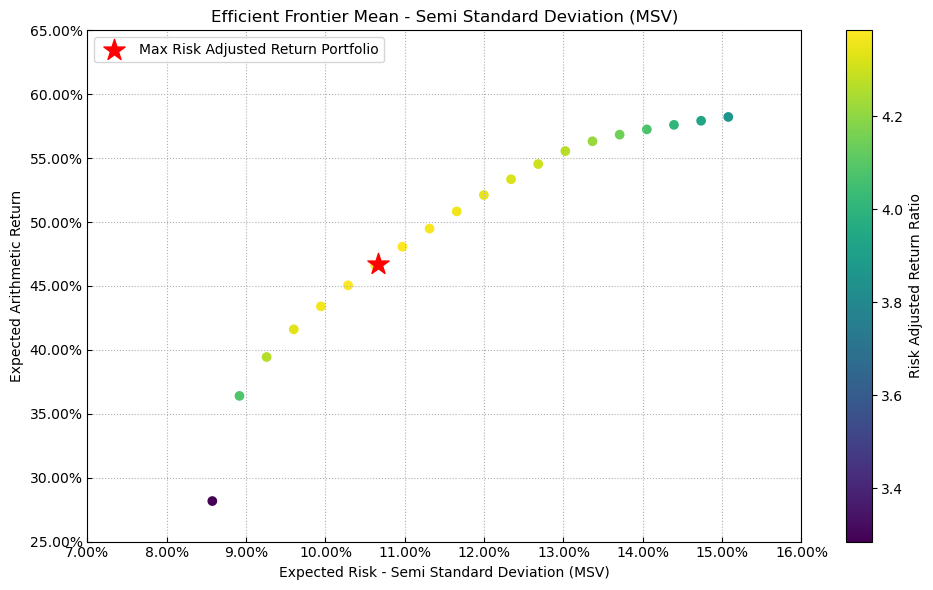

In [656]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns,
                       rm=rm, rf=0, alpha=0.05, cmap='viridis', w=w1,
                       label=label, marker='*', s=16, c='r',
                       height=6, width=10, t_factor=252, ax=None)

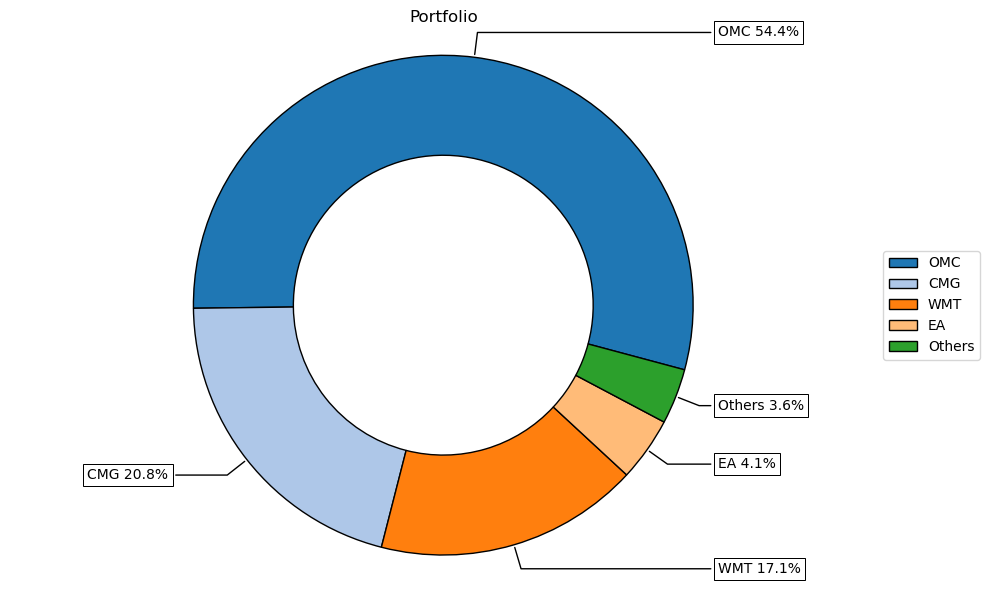

In [657]:
ax = rp.plot_pie(w=w1, title='Portfolio', height=6, width=10,
                 cmap="tab20", ax=None)

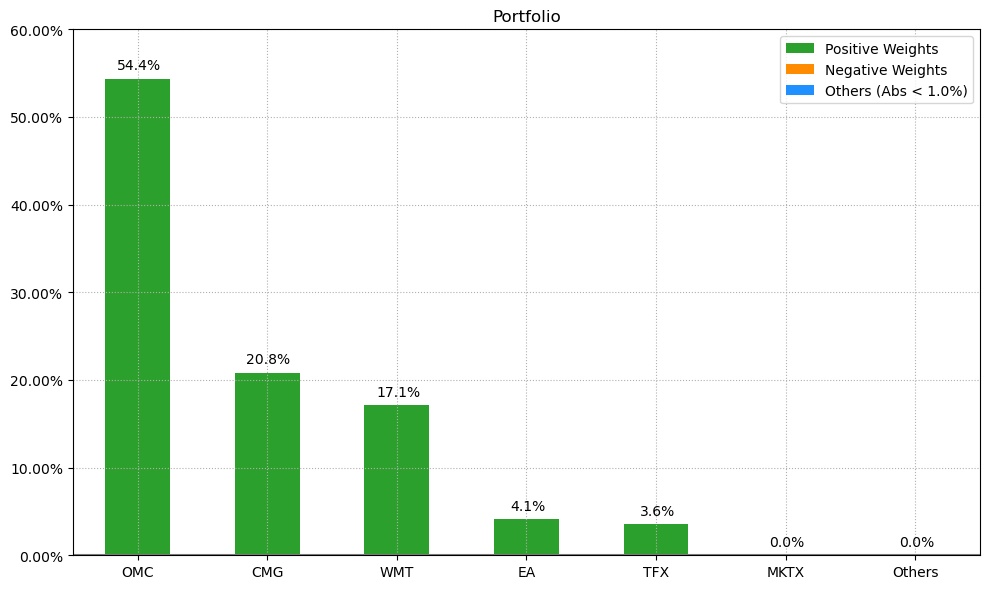

In [658]:
ax = rp.plot_bar(w1, title='Portfolio', kind="v", others=0.05,
                 nrow=25, height=6, width=10, ax=None)

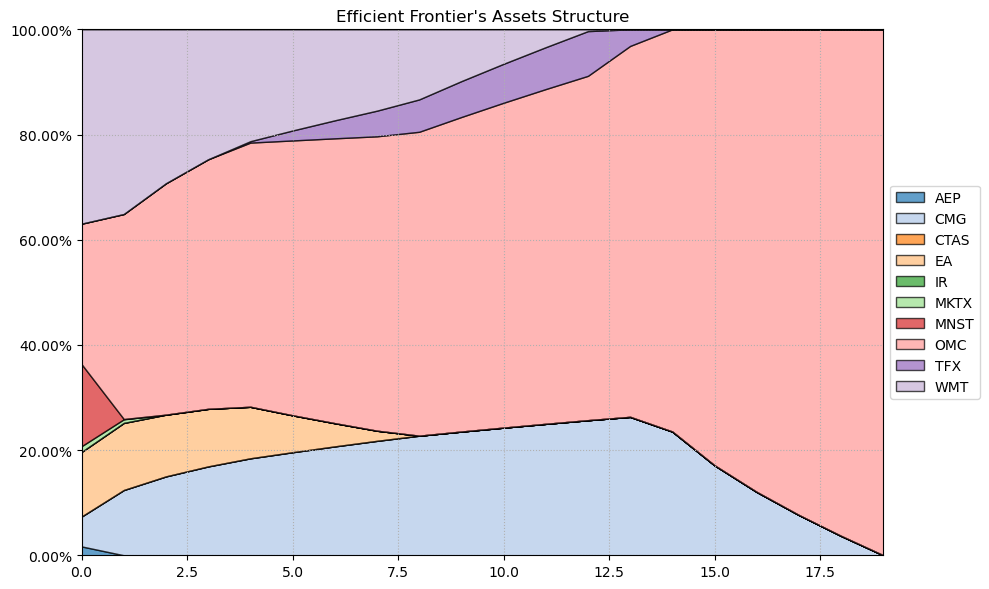

In [659]:
ax = rp.plot_frontier_area(w_frontier=ws, cmap="tab20", height=6,
                           width=10, ax=None)

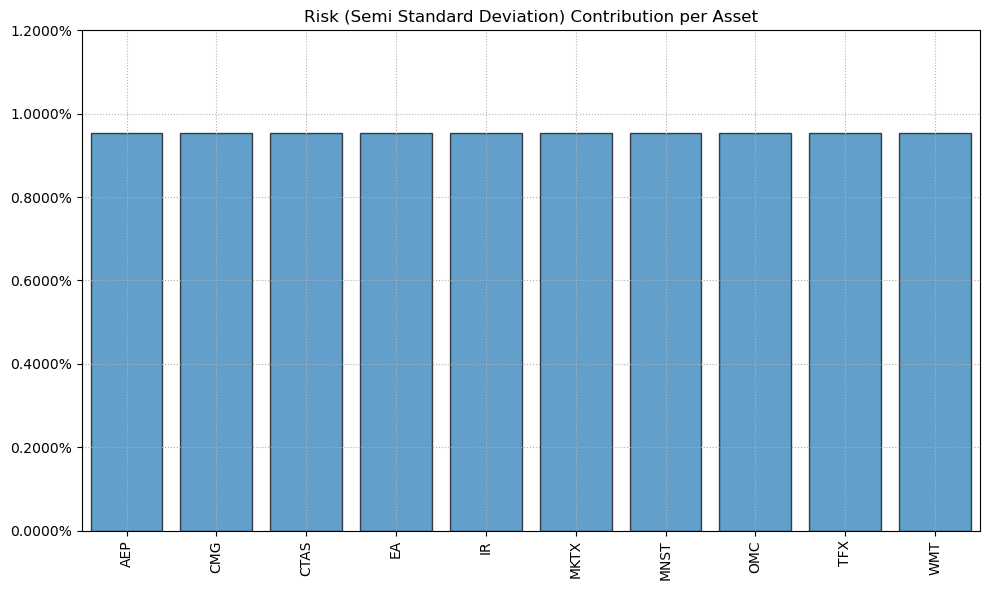

In [660]:
ax = rp.plot_risk_con(w=w2, cov=cov, returns=returns, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)

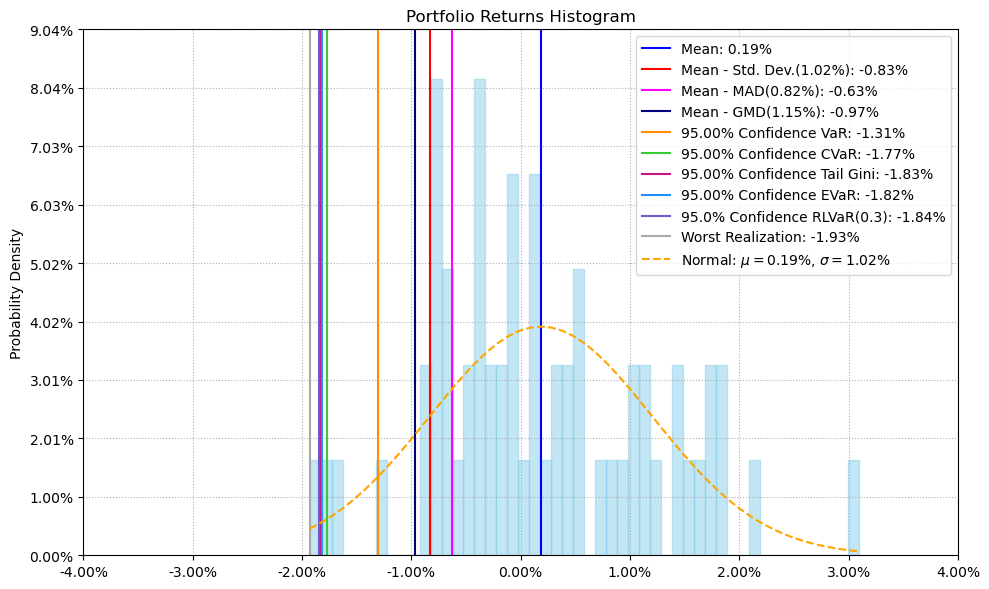

In [661]:
ax = rp.plot_hist(returns=Y, w=w1, alpha=0.05, bins=50, height=6,
                  width=10, ax=None)

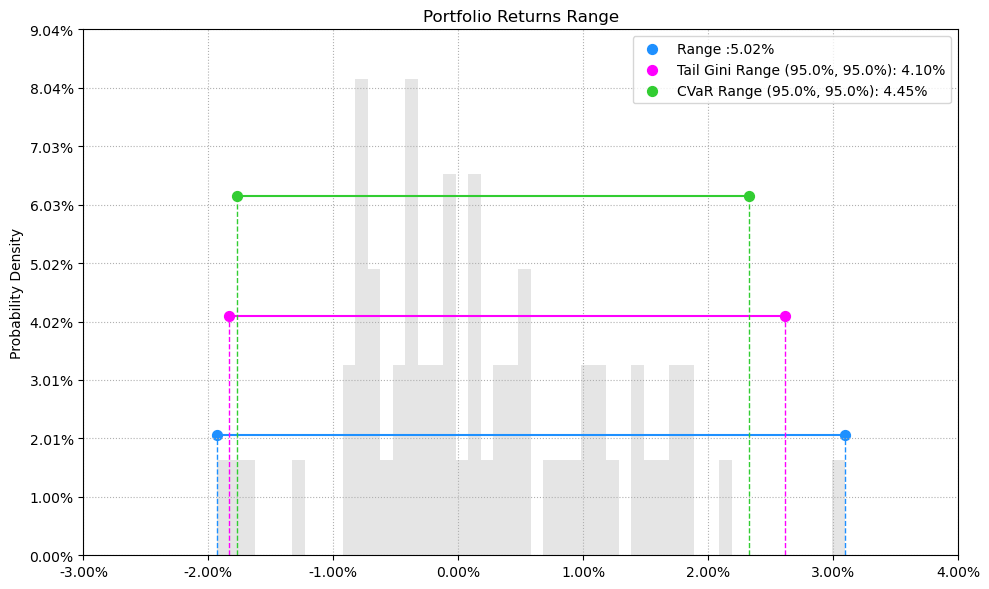

In [662]:
ax = rp.plot_range(returns=Y, w=w1, alpha=0.05, a_sim=100, beta=None,
                b_sim=None, bins=50, height=6, width=10, ax=None)

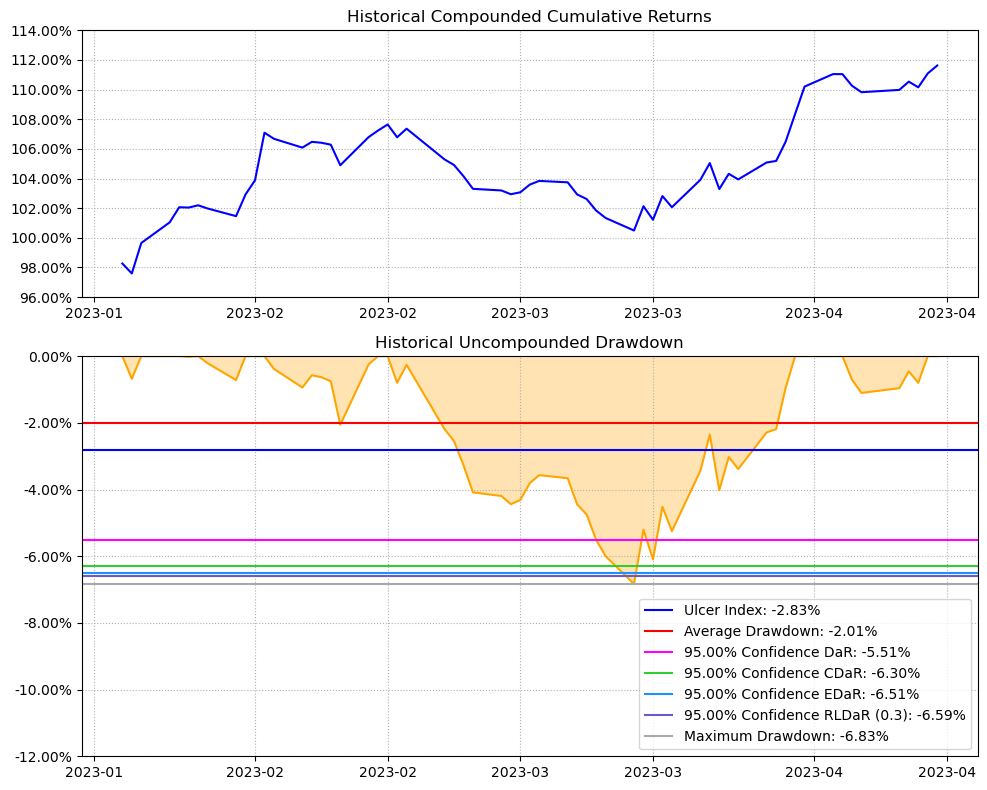

In [663]:
ax = rp.plot_drawdown(returns=Y, w=w1, alpha=0.05, height=8, width=10, ax=None)

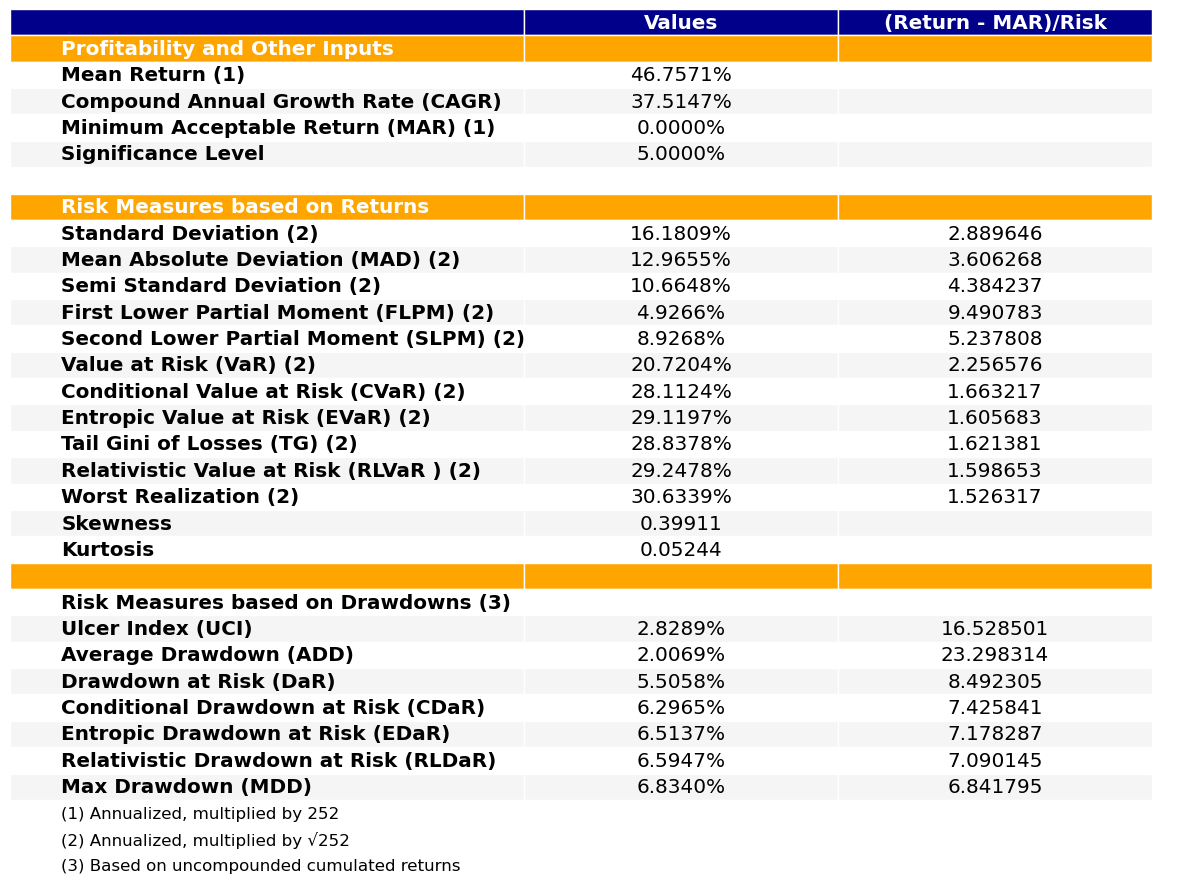

In [672]:
ax = rp.plot_table(returns=Y, w=w1, MAR=0, alpha=0.05, ax=None)

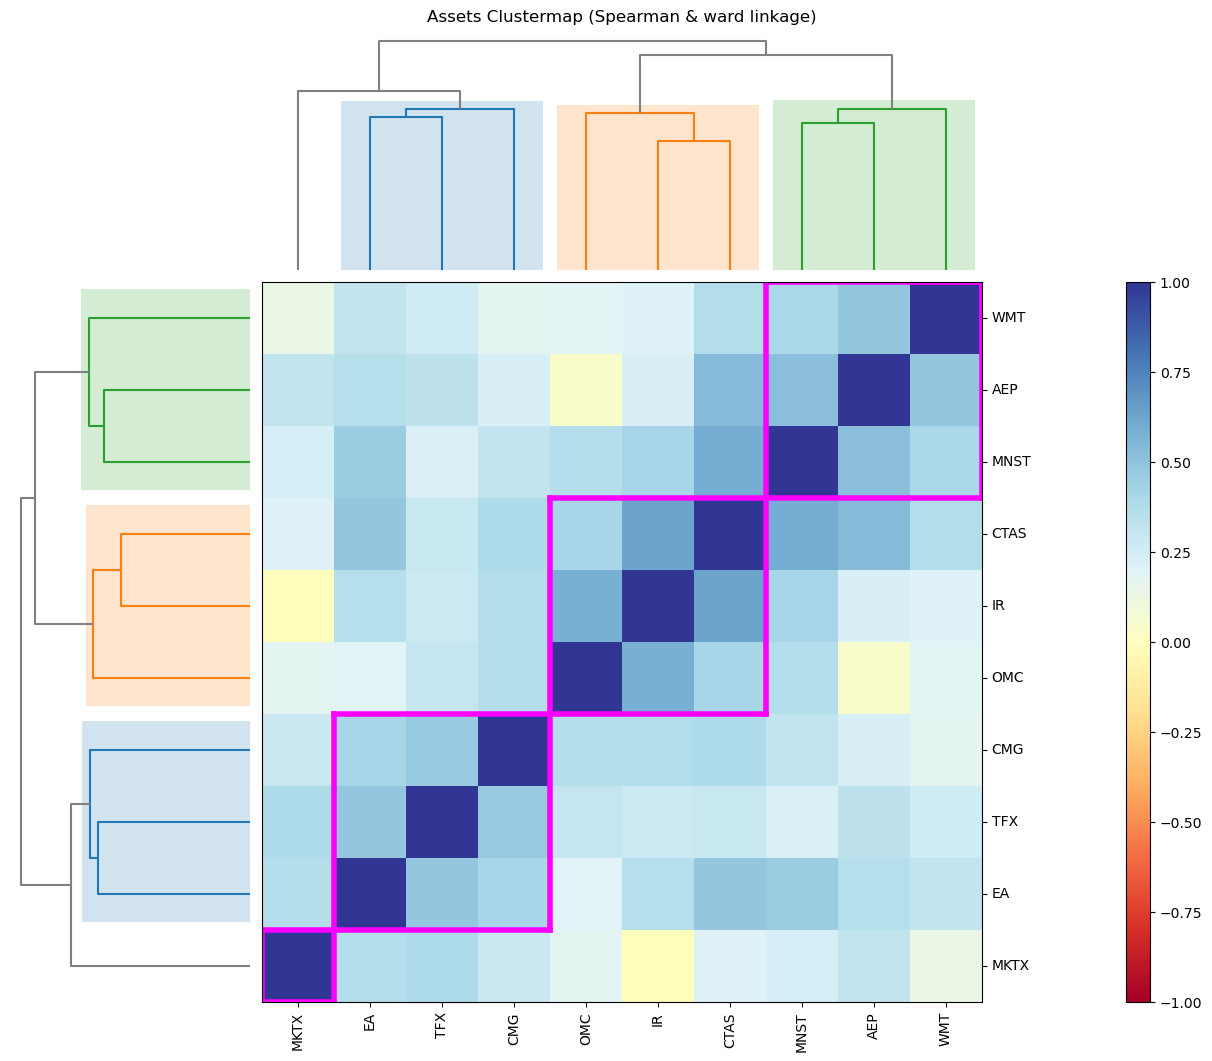

In [665]:
ax = rp.plot_clusters(returns=Y, codependence='spearman',
                      linkage='ward', k=None, max_k=10,
                      leaf_order=True, dendrogram=True, ax=None)

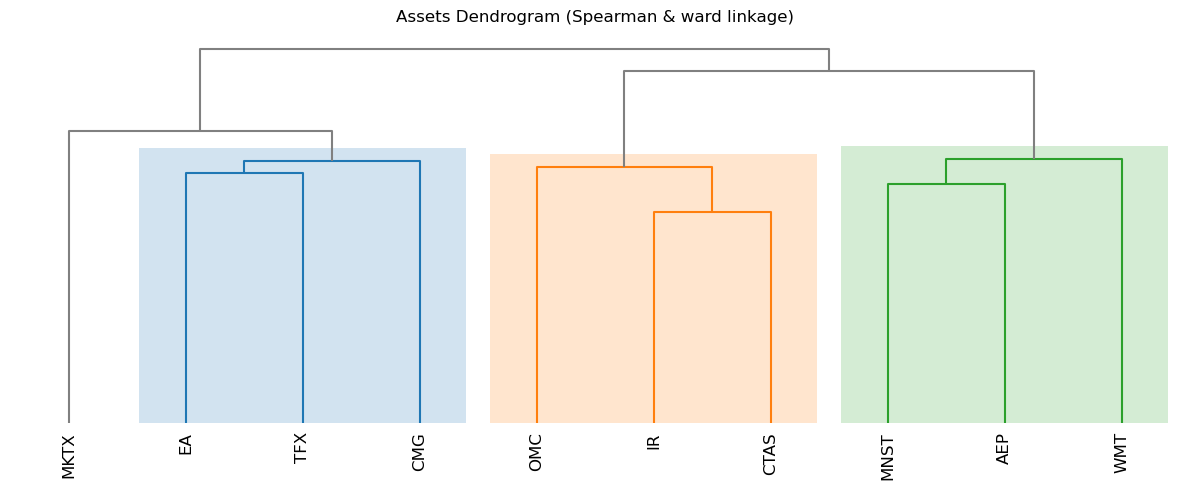

In [666]:
ax = rp.plot_dendrogram(returns=Y, codependence='spearman',
                        linkage='ward', k=None, max_k=10,
                        leaf_order=True, ax=None)

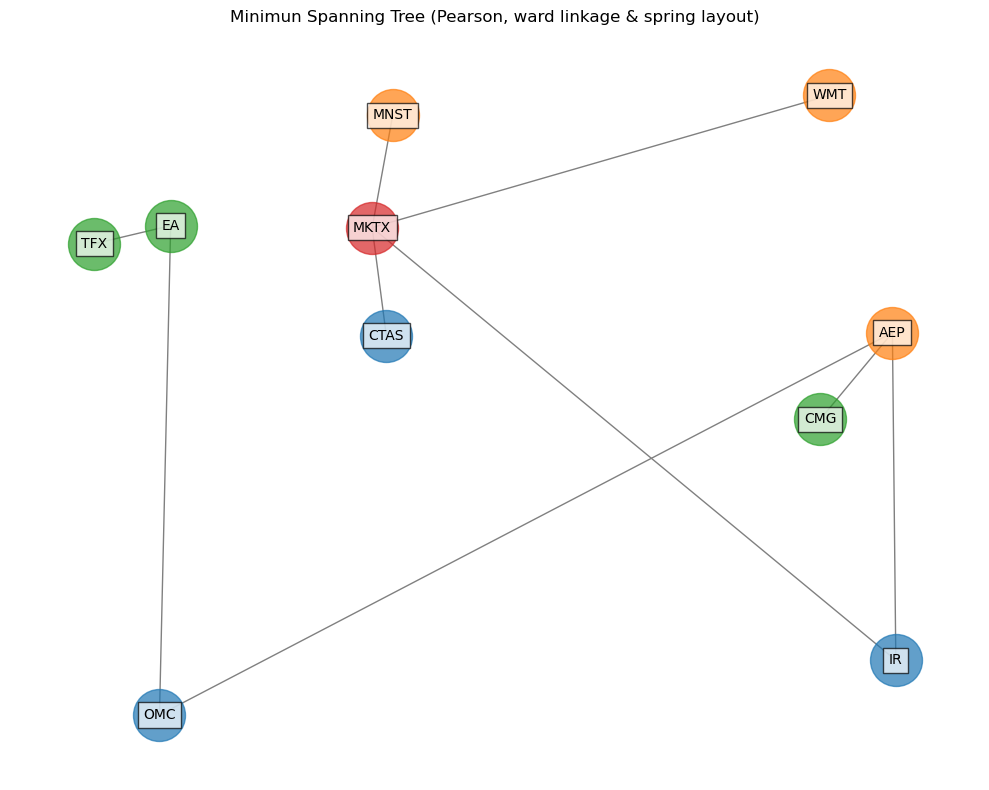

In [667]:
ax = rp.plot_network(returns=Y, codependence="pearson",
                     linkage="ward", k=None, max_k=10,
                     alpha_tail=0.05, leaf_order=True,
                     kind='spring', ax=None)

In [668]:
############################                      END             #########################################################

In [669]:
# Yahoo Portfolio 